# Imports

In [1]:
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None
from math import*
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import folium.plugins 
from folium.plugins import HeatMap
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

# Leitura da planilha e "limpeza"

In [2]:
df = pd.read_excel('dados.xlsx')
df.head(10)

,ID,Situação de rua,Onde dormiu ontem,Tempo de permanência,Sexo,Identifica com o sexo nasceu,Idade,Faixa de idade,Classificação de idade,Cor_Raça_Etnia,...,Tempo na situação,Tipo de ponto,Presença_Moradia_Improvisada,Criança_acomp_Adulto,Criança_Sozinha,Latitude,Longitude,Data,Subprefeitura,Distrito
0,1,Rua,Não se aplica,Não se aplica,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,...,NR/NS,Praça,Não,Não,Não,-23.496278,-46.391831,2021-10-25,Itaim Paulista,Itaim Paulista
1,2,Acolhido,Rua,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,...,Mais de 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.522517,-46.522712,2021-10-25,Penha,Penha
2,3,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,27,18 a 30,Juventude,Parda,...,Mais de 2 anos até 5 anos,Praça,Sim,Não,Não,-23.523293,-46.654984,2021-11-03,Sé,Santa Cecília
3,4,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,15,12 a 17,Adolescente,Branca,...,Mais de 5 anos até 10 anos,Calçada,Sim,Não,Não,-23.743078,-46.692948,2021-10-27,Capela do Socorro,Grajaú
4,5,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,Não respondeu,Sem informação,Sem informação,Sem identificação,...,NR/NS,Canteiro central,Sim,Não,Não,-23.525142,-46.625523,2021-11-09,Mooca,Pari
5,6,Rua,Não se aplica,Não se aplica,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Branca,...,NR/NS,Calçada,Sim,Não,Não,-23.550055,-46.631792,2021-11-04,Sé,Sé
6,7,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,43,31 a 49,Adulto,Branca,...,Mais de 2 anos até 5 anos,Baixos de Viaduto,Sim,Não,Não,-23.509792,-46.624871,2021-10-21,Santana-Tucuruvi,Santana
7,8,Rua,Não se aplica,Não se aplica,Masculino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,...,NR/NS,Calçada,Sim,Sim,Sim,-23.533531,-46.643104,2021-11-03,Sé,Santa Cecília
8,9,Acolhido,Neste centro de acolhida (aqui),Mais de 6 meses,Feminino,Mulher Cisgênero,44,31 a 49,Adulto,Branca,...,Mais de 5 anos até 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.534555,-46.600631,2021-11-08,Mooca,Belém
9,10,Rua,Não se aplica,Não se aplica,Masculino,Não respondeu,50,50 a 59,Adulto,Branca,...,Mais de 6 meses até 1 ano,Calçada,Sim,Não,Não,-23.552632,-46.611866,2021-11-08,Mooca,Brás


In [3]:
df.columns

Index(['ID', 'Situação de rua', 'Onde dormiu ontem', 'Tempo de permanência',
       'Sexo', 'Identifica com o sexo nasceu', 'Idade', 'Faixa de idade',
       'Classificação de idade', 'Cor_Raça_Etnia', 'Parentes no CA',
       'Tempo na situação', 'Tipo de ponto', 'Presença_Moradia_Improvisada',
       'Criança_acomp_Adulto', 'Criança_Sozinha', 'Latitude', 'Longitude',
       'Data', 'Subprefeitura', 'Distrito'],
      dtype='object')

In [4]:
df.Subprefeitura = df.Subprefeitura.replace("M'boi Mirim", "M'Boi Mirim")

# Analise Exploratória sobre Subprefeituras

In [5]:
print(pd.Series(df.Subprefeitura.value_counts()))

Subprefeitura
Sé                           12851
Mooca                         5811
Vila Maria-Vila Guilherme     1238
Santana-Tucuruvi              1232
Santo Amaro                   1090
Lapa                          1062
Vila Mariana                   972
Penha                          583
Itaquera                       549
Pinheiros                      545
Ipiranga                       544
Casa Verde-Cachoeirinha        539
São Miguel                     417
Aricanduva-Formosa-Carrão      407
Guaianases                     391
Campo Limpo                    348
Ermelino Matarazzo             346
Jabaquara                      345
Capela do Socorro              340
Vila Prudente                  303
Jaçanã-Tremembé                297
São Mateus                     288
Butantã                        263
Cidade Ademar                  193
Itaim Paulista                 186
Freguesia-Brasilândia          165
M'Boi Mirim                    143
Cidade Tiradentes              134
Perus 

In [6]:
df = df.loc[(df.Subprefeitura != 'Sapopemba')].reset_index(drop=True)

df

,ID,Situação de rua,Onde dormiu ontem,Tempo de permanência,Sexo,Identifica com o sexo nasceu,Idade,Faixa de idade,Classificação de idade,Cor_Raça_Etnia,...,Tempo na situação,Tipo de ponto,Presença_Moradia_Improvisada,Criança_acomp_Adulto,Criança_Sozinha,Latitude,Longitude,Data,Subprefeitura,Distrito
0,1,Rua,Não se aplica,Não se aplica,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,...,NR/NS,Praça,Não,Não,Não,-23.496278,-46.391831,2021-10-25,Itaim Paulista,Itaim Paulista
1,2,Acolhido,Rua,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,...,Mais de 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.522517,-46.522712,2021-10-25,Penha,Penha
2,3,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,27,18 a 30,Juventude,Parda,...,Mais de 2 anos até 5 anos,Praça,Sim,Não,Não,-23.523293,-46.654984,2021-11-03,Sé,Santa Cecília
3,4,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,15,12 a 17,Adolescente,Branca,...,Mais de 5 anos até 10 anos,Calçada,Sim,Não,Não,-23.743078,-46.692948,2021-10-27,Capela do Socorro,Grajaú
4,5,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,Não respondeu,Sem informação,Sem informação,Sem identificação,...,NR/NS,Canteiro central,Sim,Não,Não,-23.525142,-46.625523,2021-11-09,Mooca,Pari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31835,31880,Acolhido,Neste centro de acolhida (aqui),Entre 1 mês e 3 meses,Masculino,Homem Cisgênero,53,50 a 59,Adulto,Parda,...,Mais de 5 anos até 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.573725,-46.505001,2021-11-09,Aricanduva-Formosa-Carrão,Aricanduva
31836,31881,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,60,60 a 69,Idoso,Preta,...,Entre 1 semana e 1 mês,Outro,Não,Não,Não,-23.506855,-46.571922,2021-10-21,Vila Maria-Vila Guilherme,Vila Maria
31837,31882,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,...,Mais de 1 ano até 2 anos,Área externa de imóvel (recuo de garagem),Não,Não,Não,-23.671142,-46.768861,2021-11-10,Campo Limpo,Capão Redondo
31838,31883,Acolhido,Neste centro de acolhida (aqui),Entre 3 meses e 6 meses,Masculino,Homem Cisgênero,35,31 a 49,Adulto,Parda,...,Mais de 2 anos até 5 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.754310,-46.683435,2021-10-26,Capela do Socorro,Grajaú


In [7]:
sub_x_situacao = pd.crosstab(df['Situação de rua'],df.Subprefeitura, normalize='columns')


In [8]:
acolhidos = []
rua = []

for i in sub_x_situacao:
    acolhidos.append(round(sub_x_situacao[i][0],2)*100)
    rua.append(round(sub_x_situacao[i][1],2)*100)


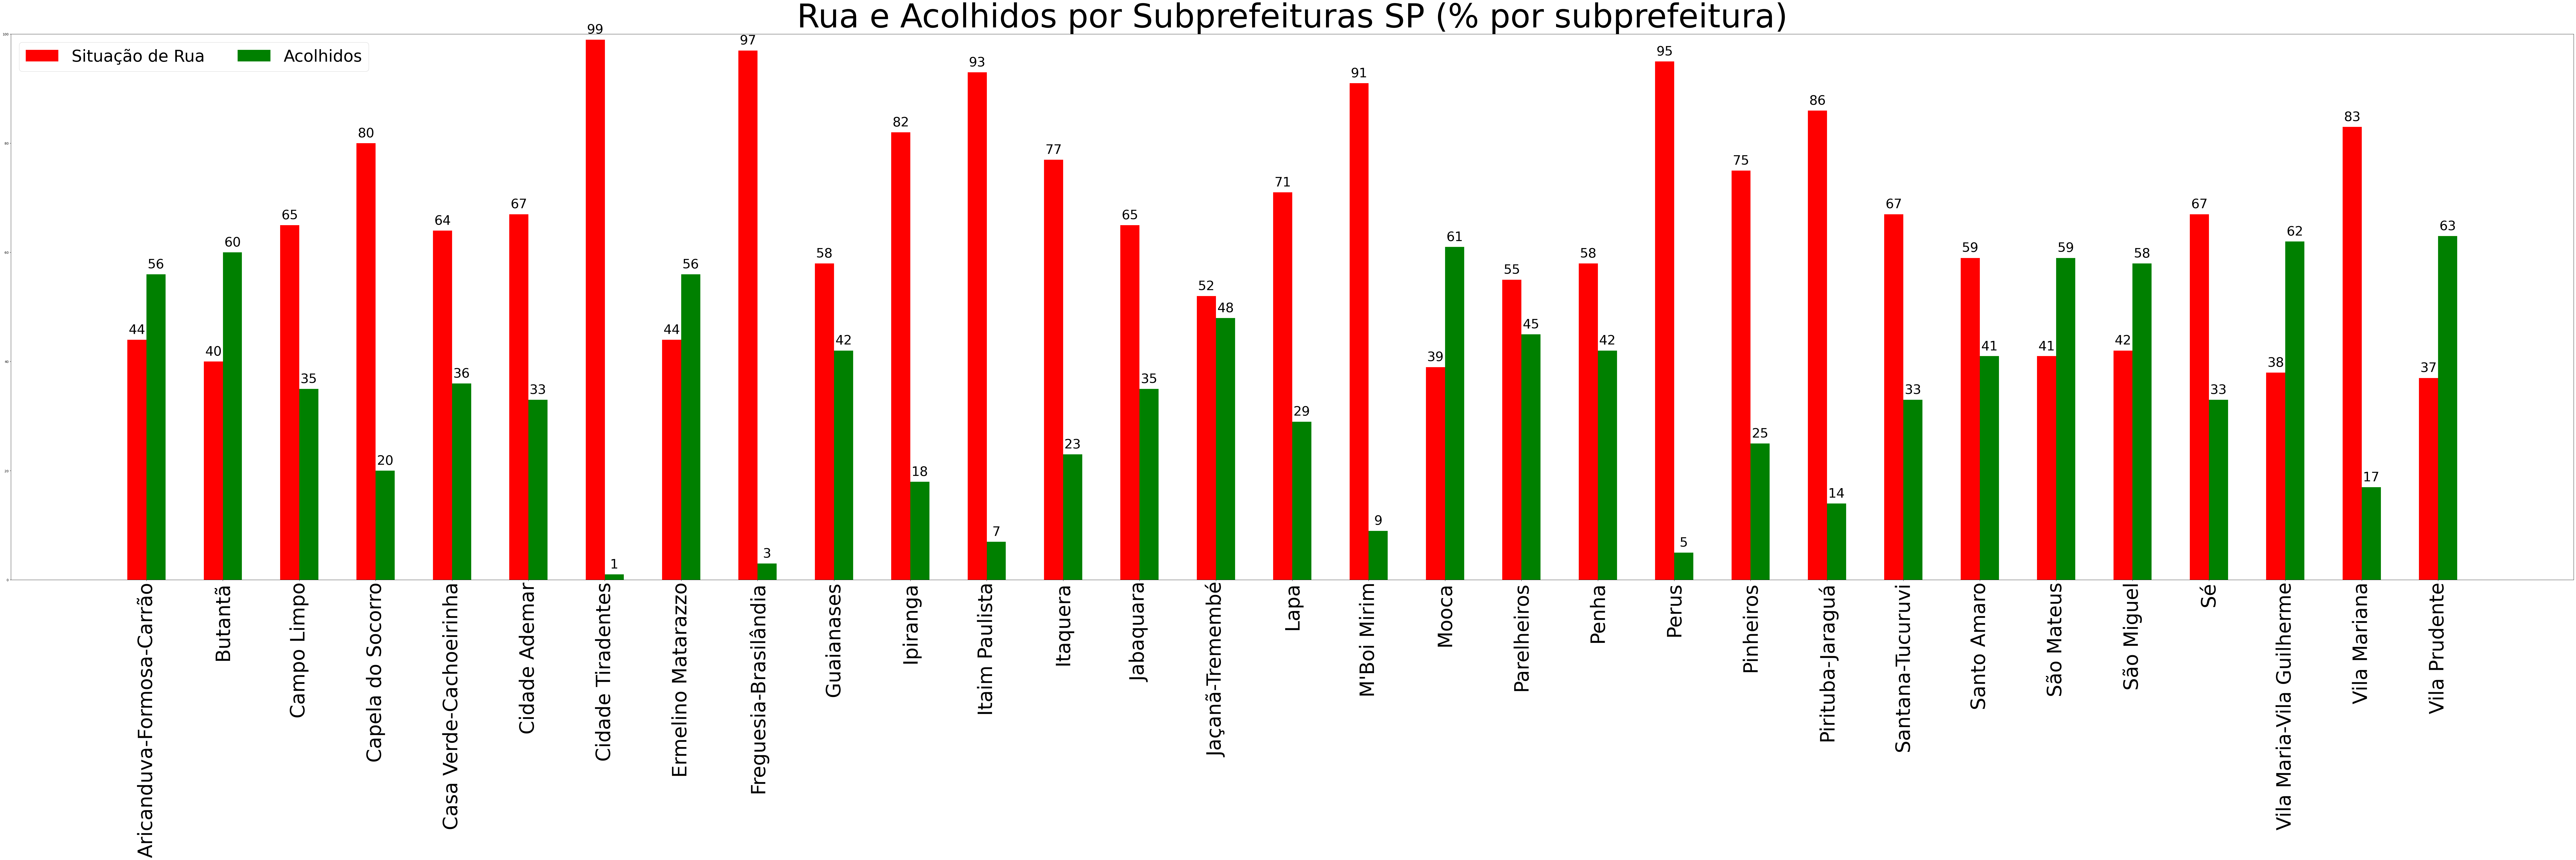

In [9]:
subprefeituras = list(sub_x_situacao)

situacao = {
    'Situação de Rua': rua,
    'Acolhidos': acolhidos
}

x = np.arange(len(subprefeituras))  # the label locations
width = 0.25 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(1,1,figsize=(140,30))
c = 'red'
for attribute, measurement in situacao.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=c)
    ax.bar_label(rects, padding=10, fontsize="40")
    multiplier += 1
    c = 'green'


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Rua e Acolhidos por Subprefeituras SP (% por subprefeitura)', fontsize="100")
ax.set_xticks(x + width - 0.1255, subprefeituras, fontsize="60", rotation=90)
ax.legend(loc='upper left', ncols=2, fontsize="50")
ax.set_ylim(0, 100)

plt.show()

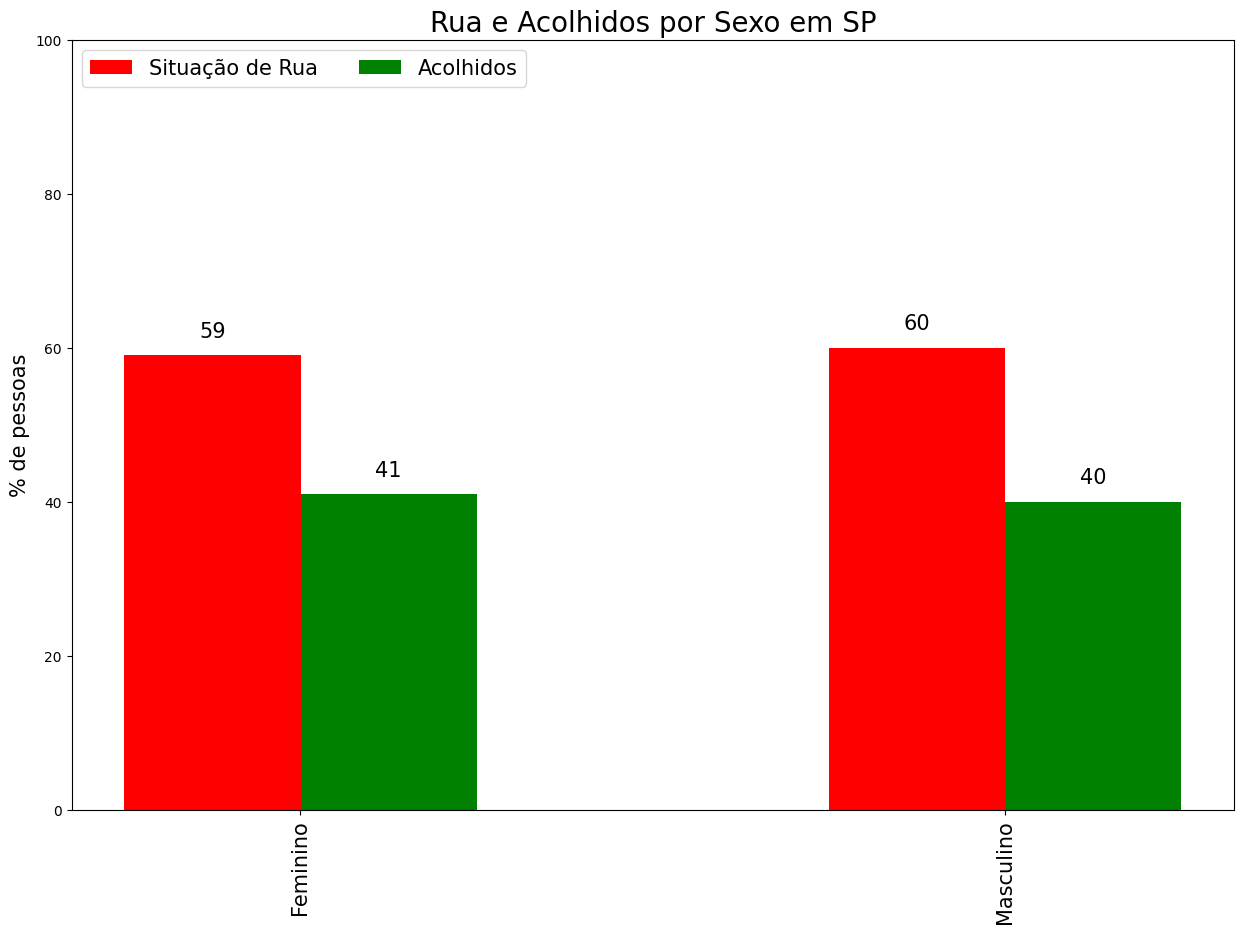

In [10]:
df_sexo = df.loc[(df.Sexo != 'Sem identificação')]
sexo_x_situacao = dict(pd.crosstab(df_sexo['Situação de rua'],df_sexo.Sexo, normalize='columns'))


acolhidos = []
rua = []

for i in sexo_x_situacao:
    acolhidos.append(round(sexo_x_situacao[i][0],2)*100)
    rua.append(round(sexo_x_situacao[i][1],2)*100)


subprefeituras = list(sexo_x_situacao)

situacao = {
    'Situação de Rua': rua,
    'Acolhidos': acolhidos
}

x = np.arange(len(subprefeituras))  # the label locations
width = 0.25 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(1,1,figsize=(15,10))
c = 'red'
for attribute, measurement in situacao.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=c)
    ax.bar_label(rects, padding=10, fontsize="15")
    multiplier += 1
    c = 'green'


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Rua e Acolhidos por Sexo em SP', fontsize="20")
ax.set_xticks(x + width - 0.1255, subprefeituras, fontsize="15", rotation=90)
ax.legend(loc='upper left', ncols=2, fontsize="15")
ax.set_ylim(0, 100)
plt.ylabel('% de pessoas', fontsize='15')

plt.show()

---
## Socioeconomicas
---

In [11]:
df_socio = pd.read_excel('socio.xlsx')
df_socio

,Cod_Reg,NOME_REG,COD_MUN,NOME_MUN,NOME_RM,CODRM,ANO,ESPVIDA,FECTOT,MORT1,...,T_FLFUND_TUDO,T_FLMED_TUDO,T_FLBAS_TUDO,T_FUND11A13_TUDO,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,335503001,Aricanduva / Vila Formosa,355030,São Paulo,RM São Paulo (SP),63500,2000,74.49,1.63,15.4,...,97.43,67.27,95.42,93.70,0.578,0.718,0.762,0.668,0.825,0.804
1,335503002,Butantã,355030,São Paulo,RM São Paulo (SP),63500,2000,75.53,1.68,13.8,...,96.18,60.39,93.51,87.79,0.635,0.680,0.789,0.665,0.842,0.876
2,335503003,Campo Limpo,355030,São Paulo,RM São Paulo (SP),63500,2000,74.37,2.01,15.6,...,94.18,48.53,90.86,87.20,0.481,0.582,0.699,0.546,0.823,0.760
3,335503004,Capela do Socorro,355030,São Paulo,RM São Paulo (SP),63500,2000,70.97,2.21,21.6,...,93.15,47.55,90.05,83.96,0.468,0.550,0.656,0.521,0.766,0.707
4,335503005,Casa Verde,355030,São Paulo,RM São Paulo (SP),63500,2000,74.59,1.85,15.2,...,95.33,58.11,92.79,89.05,0.550,0.652,0.732,0.616,0.827,0.769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,335503027,São Miguel Paulista,355030,São Paulo,RM São Paulo (SP),63500,2010,74.30,1.70,15.8,...,96.65,64.99,93.92,91.26,0.591,0.741,0.736,0.687,0.822,0.705
58,335503028,Sé,355030,São Paulo,RM São Paulo (SP),63500,2010,80.33,1.23,7.8,...,95.24,71.34,92.12,89.91,0.818,0.799,0.889,0.805,0.922,0.947
59,335503029,Vila Maria / Vila Guilherme,355030,São Paulo,RM São Paulo (SP),63500,2010,77.88,1.43,10.7,...,95.63,63.53,92.29,90.24,0.659,0.749,0.793,0.718,0.881,0.787
60,335503030,Vila Mariana,355030,São Paulo,RM São Paulo (SP),63500,2010,81.35,1.16,6.7,...,97.55,78.91,96.34,94.10,0.899,0.868,0.938,0.878,0.939,1.000


In [12]:
df_socio_2010 = df_socio[(df_socio.ANO == 2010)]
list(df_socio_2010.NOME_REG)

['Aricanduva / Vila Formosa',
 'Butantã',
 'Campo Limpo',
 'Capela do Socorro',
 'Casa Verde',
 'Cidade Ademar',
 'Cidade Tiradentes',
 'Ermelino Matarazzo',
 'Freguesia do Ó / Brasilândia',
 'Guaianases',
 'Ipiranga',
 'Itaim Paulista',
 'Itaquera',
 'Jabaquara',
 'Jaçanã / Tremembé',
 'Lapa',
 "M'Boi Mirim",
 'Mooca',
 'Parelheiros',
 'Penha',
 'Perus',
 'Pinheiros',
 'Pirituba / Jaraguá',
 'Santana / Tucuruvi',
 'Santo Amaro',
 'São Mateus',
 'São Miguel Paulista',
 'Sé',
 'Vila Maria / Vila Guilherme',
 'Vila Mariana',
 'Vila Prudente']

In [13]:
dict_replace = {
'Aricanduva / Vila Formosa': 'Aricanduva-Formosa-Carrão',
'Casa Verde': 'Casa Verde-Cachoeirinha',
'Freguesia do Ó / Brasilândia': 'Freguesia-Brasilândia',
'Jaçanã / Tremembé': 'Jaçanã-Tremembé',
'Pirituba / Jaraguá': 'Pirituba-Jaraguá',
'Santana / Tucuruvi': 'Santana-Tucuruvi',
'São Miguel Paulista': 'São Miguel',
'Vila Maria / Vila Guilherme': 'Vila Maria-Vila Guilherme',
}

df_socio_2010 = df_socio_2010.replace(dict_replace)

In [14]:
df_socio_2010

,Cod_Reg,NOME_REG,COD_MUN,NOME_MUN,NOME_RM,CODRM,ANO,ESPVIDA,FECTOT,MORT1,...,T_FLFUND_TUDO,T_FLMED_TUDO,T_FLBAS_TUDO,T_FUND11A13_TUDO,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
31,335503001,Aricanduva-Formosa-Carrão,355030,São Paulo,RM São Paulo (SP),63500,2010,78.20,1.37,10.3,...,96.47,71.40,94.13,89.17,0.704,0.781,0.822,0.754,0.887,0.831
32,335503002,Butantã,355030,São Paulo,RM São Paulo (SP),63500,2010,79.70,1.35,8.5,...,96.49,63.04,92.71,88.91,0.731,0.753,0.859,0.746,0.912,0.932
33,335503003,Campo Limpo,355030,São Paulo,RM São Paulo (SP),63500,2010,78.00,1.55,10.5,...,96.29,58.66,92.80,90.72,0.603,0.707,0.783,0.670,0.883,0.810
34,335503004,Capela do Socorro,355030,São Paulo,RM São Paulo (SP),63500,2010,75.22,1.71,14.4,...,96.51,62.30,93.86,92.12,0.592,0.724,0.750,0.677,0.837,0.745
35,335503005,Casa Verde-Cachoeirinha,355030,São Paulo,RM São Paulo (SP),63500,2010,77.95,1.44,10.6,...,95.58,64.89,92.39,90.33,0.678,0.757,0.799,0.730,0.883,0.792
36,335503006,Cidade Ademar,355030,São Paulo,RM São Paulo (SP),63500,2010,76.62,1.63,12.4,...,95.19,57.44,91.76,89.00,0.585,0.698,0.758,0.658,0.860,0.771
37,335503007,Cidade Tiradentes,355030,São Paulo,RM São Paulo (SP),63500,2010,72.87,1.90,18.2,...,96.47,60.01,93.84,89.88,0.598,0.700,0.708,0.664,0.798,0.670
38,335503008,Ermelino Matarazzo,355030,São Paulo,RM São Paulo (SP),63500,2010,75.97,1.54,13.3,...,97.09,67.54,94.42,94.59,0.656,0.783,0.777,0.738,0.850,0.747
39,335503009,Freguesia-Brasilândia,355030,São Paulo,RM São Paulo (SP),63500,2010,76.22,1.56,12.9,...,97.22,60.72,94.30,92.34,0.635,0.722,0.762,0.692,0.854,0.748
40,335503010,Guaianases,355030,São Paulo,RM São Paulo (SP),63500,2010,73.39,1.79,17.3,...,96.36,60.79,92.63,91.66,0.554,0.721,0.713,0.660,0.807,0.681


In [15]:
df_socio_usar = df_socio_2010.loc[:,['NOME_REG','IDHM','I_ESCOLARIDADE','I_FREQ_PROP','POP','PEA18M','T_FUNDIN_TODOS_MMEIO','AGUA_ESGOTO','RENOCUP','RDPC','PPOB','GINI','RAZDEP']]

df_socio_usar

,NOME_REG,IDHM,I_ESCOLARIDADE,I_FREQ_PROP,POP,PEA18M,T_FUNDIN_TODOS_MMEIO,AGUA_ESGOTO,RENOCUP,RDPC,PPOB,GINI,RAZDEP
31,Aricanduva-Formosa-Carrão,0.822,0.704,0.781,266983.0,134840,1.71,0.10,2033.64,1411.11,8.98,0.52,41.77
32,Butantã,0.859,0.731,0.753,424938.0,232627,3.56,1.03,3261.16,2634.84,10.44,0.68,38.92
33,Campo Limpo,0.783,0.603,0.707,606601.0,308735,5.86,0.35,1956.30,1236.35,17.57,0.62,40.62
34,Capela do Socorro,0.750,0.592,0.724,594216.0,300644,6.42,0.87,1293.36,824.23,20.19,0.52,41.50
35,Casa Verde-Cachoeirinha,0.799,0.678,0.757,308844.0,163724,2.63,0.10,1670.66,1104.70,11.84,0.50,41.47
36,Cidade Ademar,0.758,0.585,0.698,410736.0,202719,6.04,0.63,1391.98,971.76,18.51,0.58,40.90
37,Cidade Tiradentes,0.708,0.598,0.700,211420.0,99315,7.29,0.42,931.58,516.64,27.20,0.40,45.19
38,Ermelino Matarazzo,0.777,0.656,0.783,207366.0,106218,2.93,0.53,1364.16,837.54,14.73,0.43,40.72
39,Freguesia-Brasilândia,0.762,0.635,0.722,406950.0,208292,5.42,0.43,1326.02,840.72,18.16,0.48,42.78
40,Guaianases,0.713,0.554,0.721,268319.0,122029,7.82,0.73,955.20,554.23,26.78,0.42,43.96


In [16]:
colunas_usar = ['IDHM','I_ESCOLARIDADE','I_FREQ_PROP','POP','PEA18M','T_FUNDIN_TODOS_MMEIO','AGUA_ESGOTO','RENOCUP','RDPC','PPOB','GINI','RAZDEP']

In [17]:
for i in colunas_usar:
    df[str(i)] = 0

for i in range (31,62):
    for j in range(len(df)):
        if df.Subprefeitura[j] == df_socio_usar["NOME_REG"][i]:
            for c in colunas_usar:
                df[str(c)][j] = df_socio_usar[str(c)][i]



In [18]:
df

,ID,Situação de rua,Onde dormiu ontem,Tempo de permanência,Sexo,Identifica com o sexo nasceu,Idade,Faixa de idade,Classificação de idade,Cor_Raça_Etnia,...,I_FREQ_PROP,POP,PEA18M,T_FUNDIN_TODOS_MMEIO,AGUA_ESGOTO,RENOCUP,RDPC,PPOB,GINI,RAZDEP
0,1,Rua,Não se aplica,Não se aplica,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,...,0.735,372829,176578,6.53,0.46,1016.84,587.95,25.47,0.43,43.49
1,2,Acolhido,Rua,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,...,0.779,473872,248050,2.74,0.27,1595.76,1064.38,10.83,0.46,40.78
2,3,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,27,18 a 30,Juventude,Parda,...,0.799,421638,261564,0.99,0.21,3513.45,2894.76,4.32,0.58,32.88
3,4,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,15,12 a 17,Adolescente,Branca,...,0.724,594216,300644,6.42,0.87,1293.36,824.23,20.19,0.52,41.50
4,5,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,Não respondeu,Sem informação,Sem informação,Sem identificação,...,0.815,338675,189013,1.16,0.05,3017.22,2262.48,5.23,0.56,40.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31835,31880,Acolhido,Neste centro de acolhida (aqui),Entre 1 mês e 3 meses,Masculino,Homem Cisgênero,53,50 a 59,Adulto,Parda,...,0.781,266983,134840,1.71,0.10,2033.64,1411.11,8.98,0.52,41.77
31836,31881,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,60,60 a 69,Idoso,Preta,...,0.749,296356,155167,3.41,0.01,1600.51,1072.66,11.47,0.48,42.31
31837,31882,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,...,0.707,606601,308735,5.86,0.35,1956.30,1236.35,17.57,0.62,40.62
31838,31883,Acolhido,Neste centro de acolhida (aqui),Entre 3 meses e 6 meses,Masculino,Homem Cisgênero,35,31 a 49,Adulto,Parda,...,0.724,594216,300644,6.42,0.87,1293.36,824.23,20.19,0.52,41.50


In [20]:
df_encoded.columns

Index(['ID', 'Situação de rua', 'Onde dormiu ontem', 'Tempo de permanência',
       'Identifica com o sexo nasceu', 'Idade', 'Faixa de idade',
       'Tipo de ponto', 'Presença_Moradia_Improvisada', 'Criança_acomp_Adulto',
       'Criança_Sozinha', 'Latitude', 'Longitude', 'Data', 'Subprefeitura',
       'Distrito', 'IDHM', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'POP', 'PEA18M',
       'T_FUNDIN_TODOS_MMEIO', 'AGUA_ESGOTO', 'RENOCUP', 'RDPC', 'PPOB',
       'GINI', 'RAZDEP', 'Sexo_Feminino', 'Sexo_Masculino',
       'Sexo_Sem identificação', 'Classificação de idade_Adolescente',
       'Classificação de idade_Adulto', 'Classificação de idade_Criança',
       'Classificação de idade_Idoso', 'Classificação de idade_Juventude',
       'Classificação de idade_Sem informação', 'Cor_Raça_Etnia_Amarela',
       'Cor_Raça_Etnia_Branca', 'Cor_Raça_Etnia_Indígena',
       'Cor_Raça_Etnia_Não respondeu', 'Cor_Raça_Etnia_Parda',
       'Cor_Raça_Etnia_Preta', 'Cor_Raça_Etnia_Sem identificação',
       '

In [45]:
#Função para separar as variaveis 

df_encoded = pd.get_dummies(df, columns=['Sexo', 'Classificação de idade', 'Cor_Raça_Etnia','Tempo na situação','Parentes no CA'])

lista = ['Sexo_Feminino', 'Sexo_Masculino', 'Sexo_Sem identificação',
'Classificação de idade_Criança', 'Classificação de idade_Adolescente',
'Classificação de idade_Juventude', 'Classificação de idade_Adulto',
'Classificação de idade_Idoso',
'Classificação de idade_Sem informação', 'Cor_Raça_Etnia_Amarela',
'Cor_Raça_Etnia_Branca', 'Cor_Raça_Etnia_Indígena',
'Cor_Raça_Etnia_Não respondeu', 'Cor_Raça_Etnia_Parda',
'Cor_Raça_Etnia_Preta', 'Cor_Raça_Etnia_Sem identificação',
'Tempo na situação_Até 1 semana',
'Tempo na situação_Entre 1 semana e 1 mês',
'Tempo na situação_Mais de 1 ano até 2 anos',
'Tempo na situação_Mais de 1 mês até 6 meses',
'Tempo na situação_Mais de 10 anos',
'Tempo na situação_Mais de 2 anos até 5 anos',
'Tempo na situação_Mais de 5 anos até 10 anos',
'Tempo na situação_Mais de 6 meses até 1 ano',
'Tempo na situação_NR/NS', 'Parentes no CA_Não',
'Parentes no CA_Não informado', 'Parentes no CA_Sim','IDHM','I_ESCOLARIDADE','I_FREQ_PROP',
'T_FUNDIN_TODOS_MMEIO','AGUA_ESGOTO','RENOCUP','RDPC','PPOB','GINI','RAZDEP']

def splitdataset(df): 

    # Separating the target variable 
    X = df[lista] 
    Y = df['Situação de rua'] 

    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.1, random_state = 100) 
        
    return X, Y, X_train, X_test, y_train, y_test 

# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 

    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=100, min_samples_leaf=50) 

    # Performing training 
    clf_gini.fit(X_train, y_train)

    return clf_gini 
        
# Function to perform training with entropy. 
def train_using_entropy(X_train, X_test, y_train): 

    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 100, min_samples_leaf = 50) 

    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 

# Function to make predictions 
def prediction(X_test, clf_object): 

    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
        
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
        
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
        
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
        
    print("Report : ", 
    classification_report(y_test, y_pred)) 

# Driver code 
def main(df): 

    # Building Phase 
    data = df 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = train_using_entropy(X_train, X_test, y_train) 
    print('-'*20, 'Test', '-'*20)           
    # Operational Phase 
    print("Results Using Gini Index:") 
        
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
        
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy)
    print('-'*20, 'Train', '-'*20)
    print("Results Using Gini Index:")
    # Prediction using gini 
    y_pred_gini = prediction(X_train, clf_gini) 
    cal_accuracy(y_train, y_pred_gini) 
        
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_train, clf_entropy) 
    cal_accuracy(y_train, y_pred_entropy)



In [46]:
# Calling main function 
if __name__=="__main__": 
    main(df_encoded)

-------------------- Test --------------------
Results Using Gini Index:
Predicted values:
['Acolhido' 'Acolhido' 'Rua' ... 'Acolhido' 'Rua' 'Rua']
Confusion Matrix:  [[ 903  377]
 [ 418 1486]]
Accuracy :  75.03140703517587
Report :                precision    recall  f1-score   support

    Acolhido       0.68      0.71      0.69      1280
         Rua       0.80      0.78      0.79      1904

    accuracy                           0.75      3184
   macro avg       0.74      0.74      0.74      3184
weighted avg       0.75      0.75      0.75      3184

Results Using Entropy:
Predicted values:
['Acolhido' 'Acolhido' 'Rua' ... 'Acolhido' 'Rua' 'Rua']
Confusion Matrix:  [[ 914  366]
 [ 431 1473]]
Accuracy :  74.96859296482413
Report :                precision    recall  f1-score   support

    Acolhido       0.68      0.71      0.70      1280
         Rua       0.80      0.77      0.79      1904

    accuracy                           0.75      3184
   macro avg       0.74      0.74    